# **Install and Import Libraries**




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Download and Read Data


In [5]:
df=pd.read_csv('/content/computer_prices_all.csv')
df.head(2)

,ID,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99


# **EDA**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100000 non-null  int64  
 1   device_type          100000 non-null  object 
 2   brand                100000 non-null  object 
 3   model                100000 non-null  object 
 4   release_year         100000 non-null  int64  
 5   os                   100000 non-null  object 
 6   form_factor          100000 non-null  object 
 7   cpu_brand            100000 non-null  object 
 8   cpu_model            100000 non-null  object 
 9   cpu_tier             100000 non-null  int64  
 10  cpu_cores            100000 non-null  int64  
 11  cpu_threads          100000 non-null  int64  
 12  cpu_base_ghz         100000 non-null  float64
 13  cpu_boost_ghz        100000 non-null  float64
 14  gpu_brand            100000 non-null  object 
 15  gpu_model         

In [7]:
df.isnull().sum()

,0
ID,0
device_type,0
brand,0
model,0
release_year,0
os,0
form_factor,0
cpu_brand,0
cpu_model,0
cpu_tier,0


In [8]:
df.duplicated().sum()

np.int64(0)

# Split data into object and numerical

In [9]:
df_obj=df.select_dtypes(include='object')
df_num=df.select_dtypes(exclude='object')

In [10]:
df_num.head(2)

,ID,release_year,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_tier,vram_gb,ram_gb,...,storage_drive_count,display_size_in,refresh_hz,battery_wh,charger_watts,psu_watts,bluetooth,weight_kg,warranty_months,price
0,0,2022,3,12,24,2.8,3.8,2,6,16,...,1,27.0,90,0,0,750,5.1,11.00,36,1383.99
1,1,2022,4,12,24,2.6,3.6,4,10,64,...,1,16.0,90,56,120,0,5.3,2.03,12,2274.99


In [11]:
df_num.shape

(100000, 21)

Removing ID feature

In [12]:
df_num.drop('ID',axis=1,inplace=True)

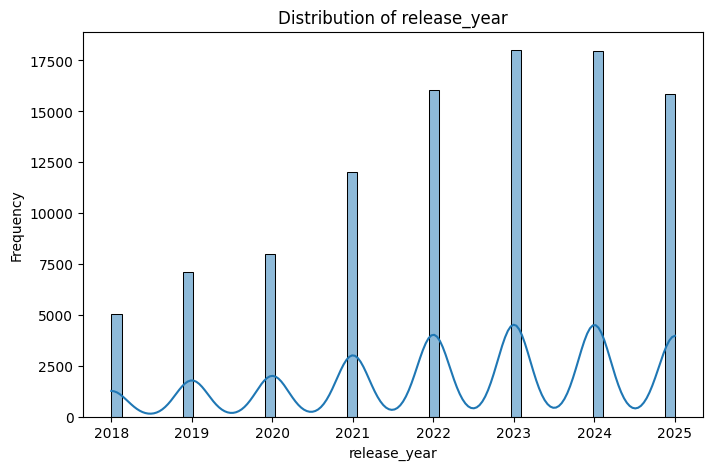

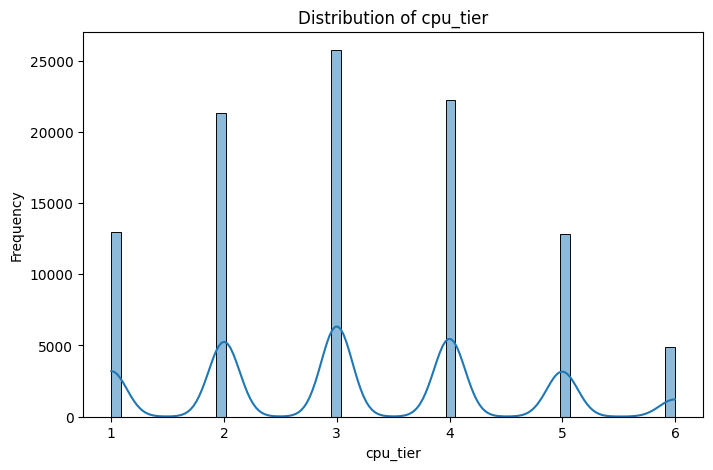

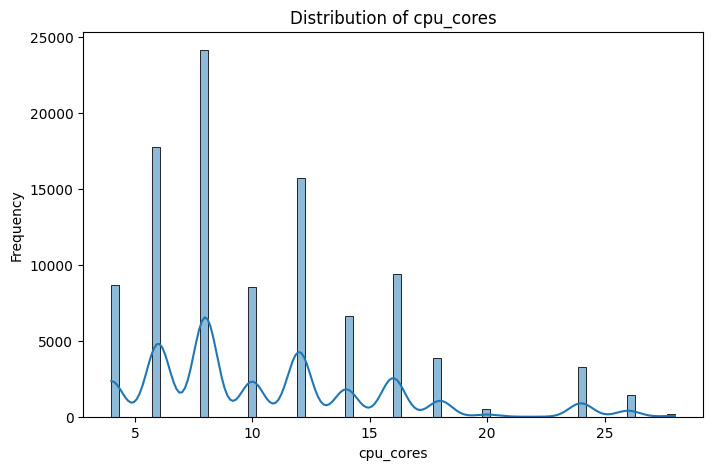

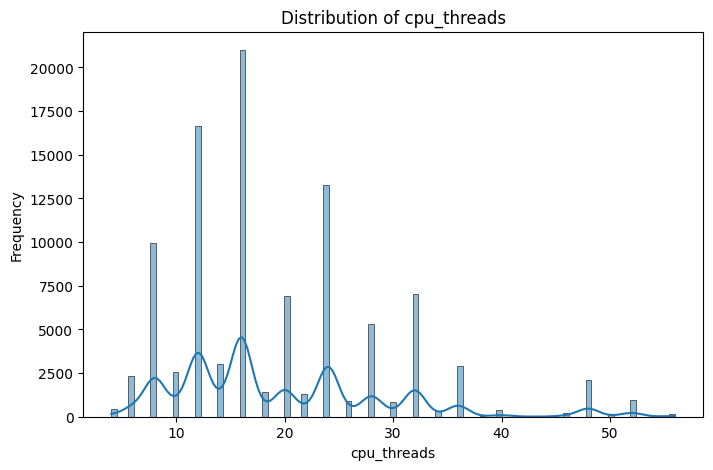

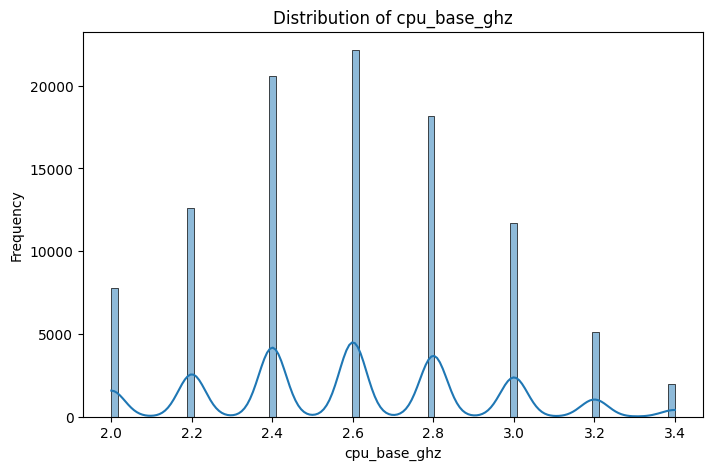

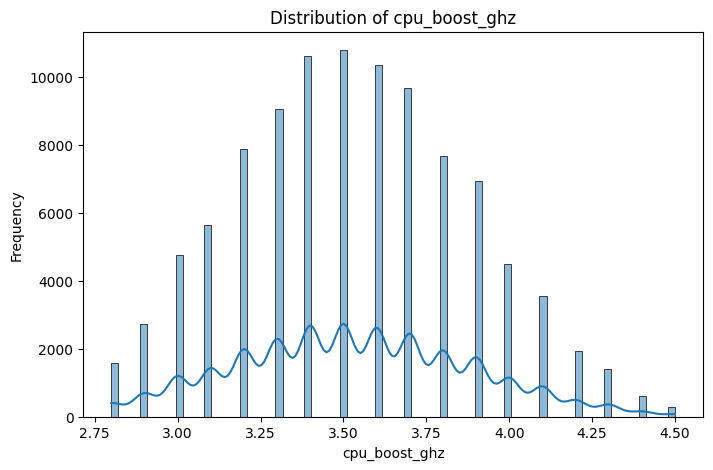

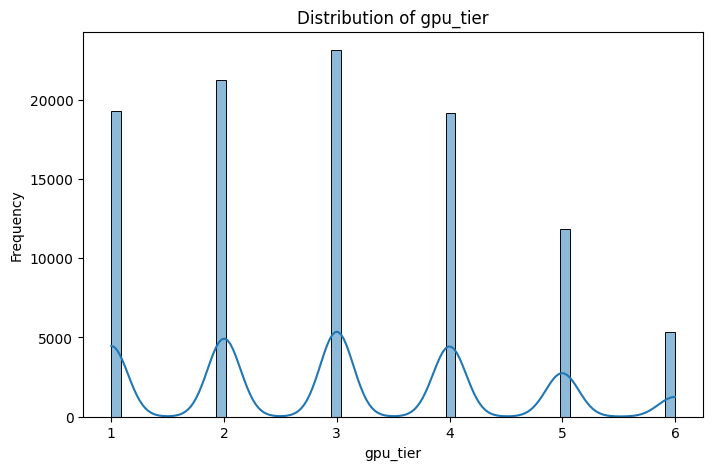

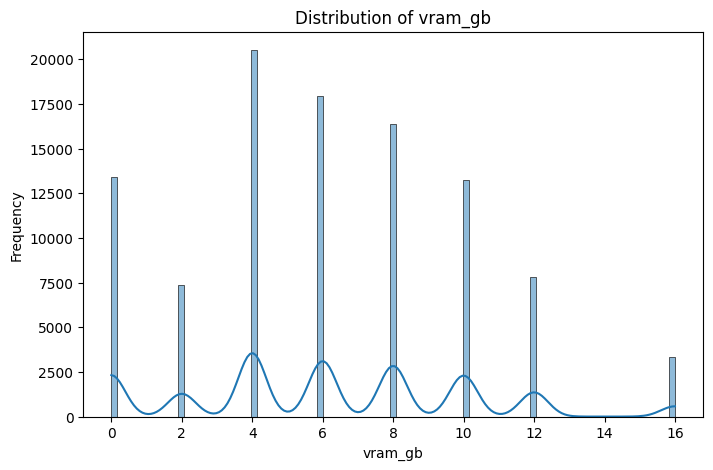

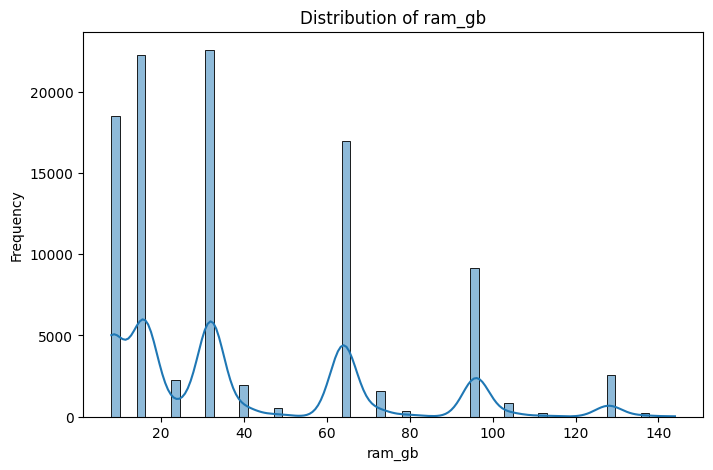

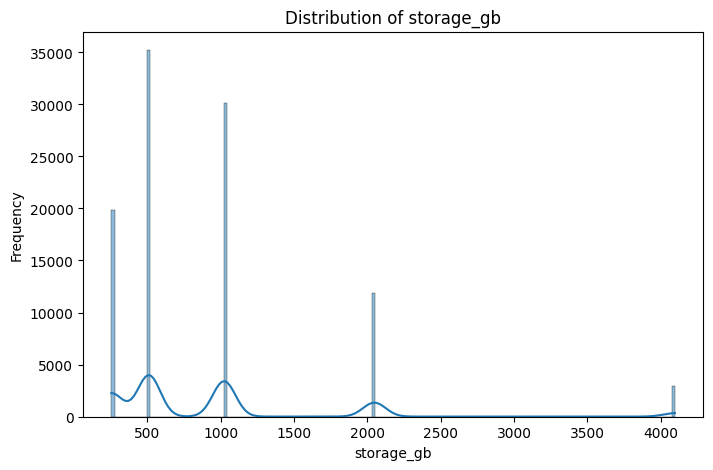

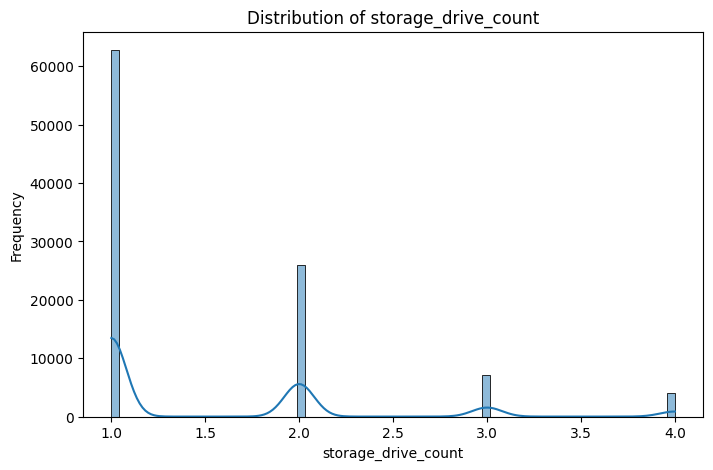

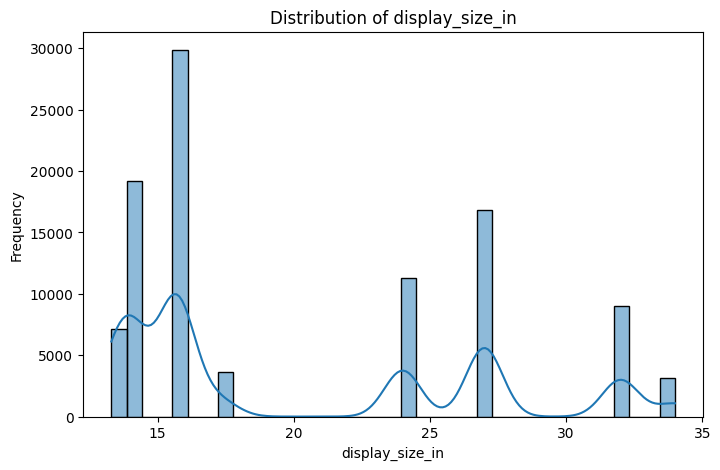

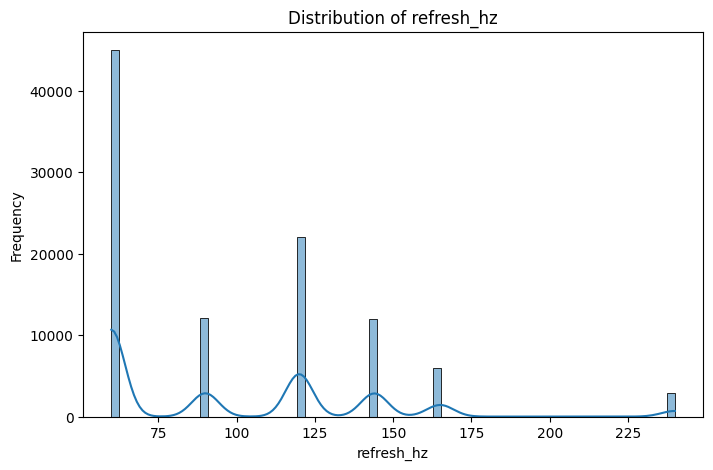

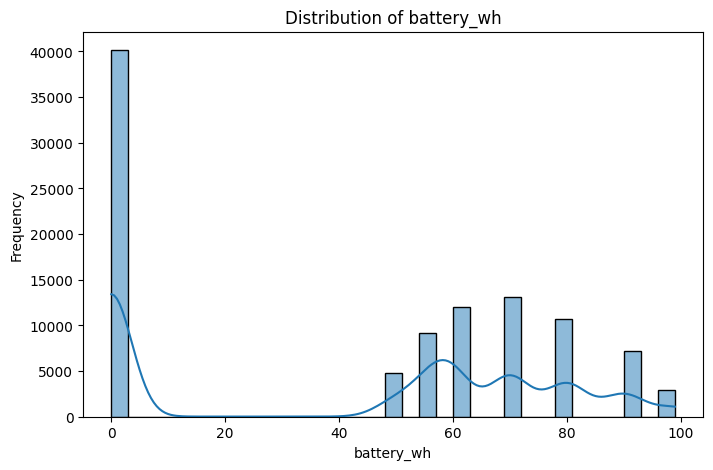

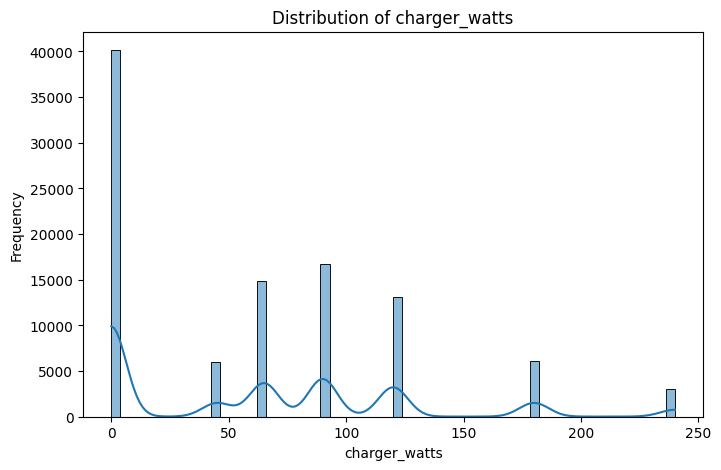

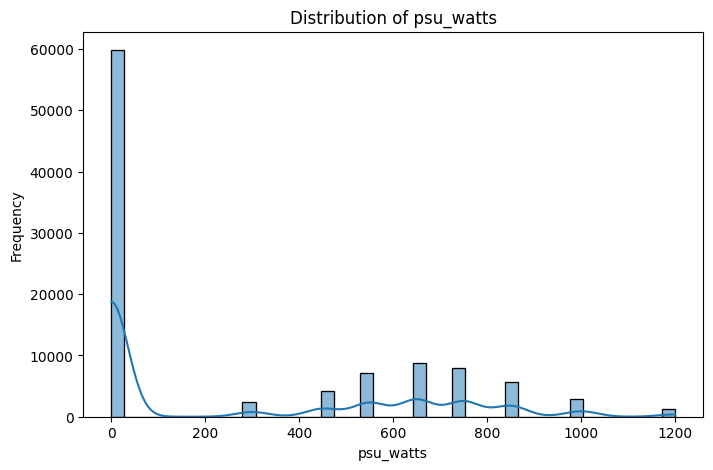

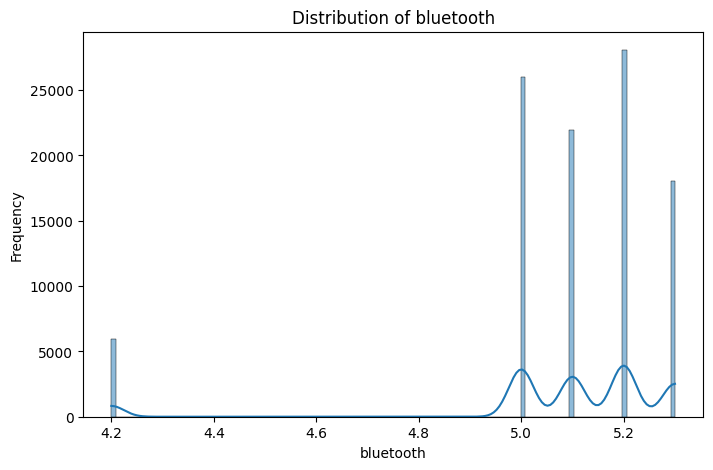

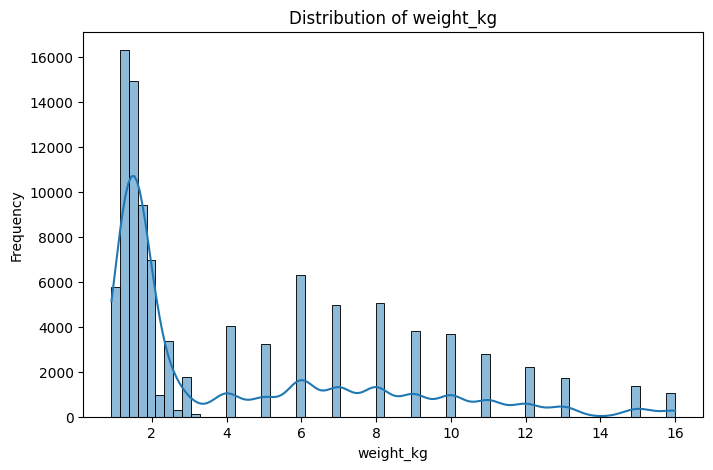

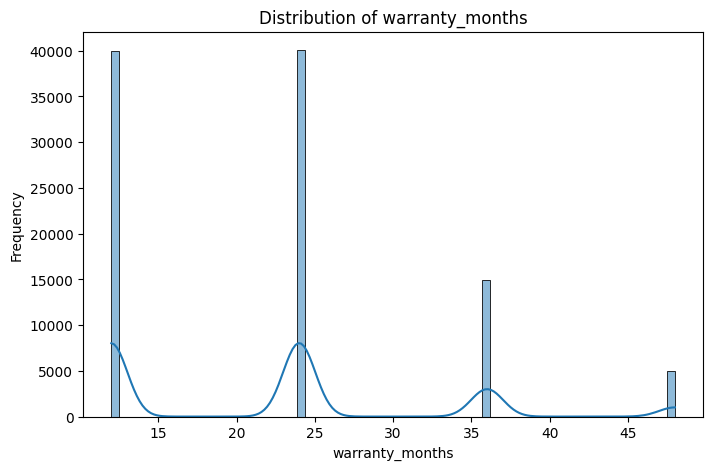

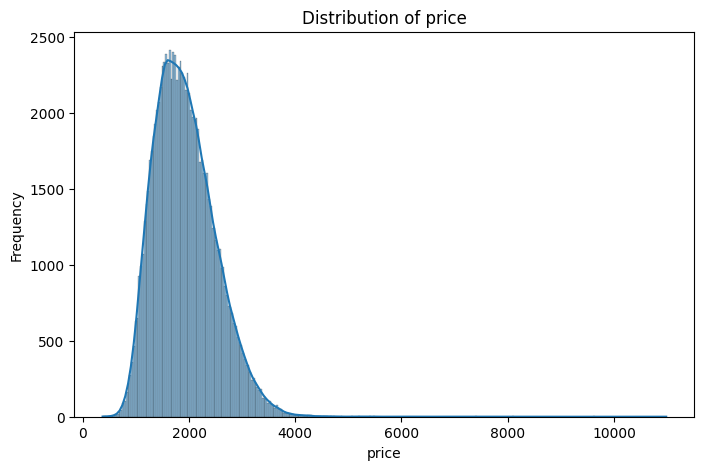

In [13]:
# Plot the distribution of numerical features
for column in df_num.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_num, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

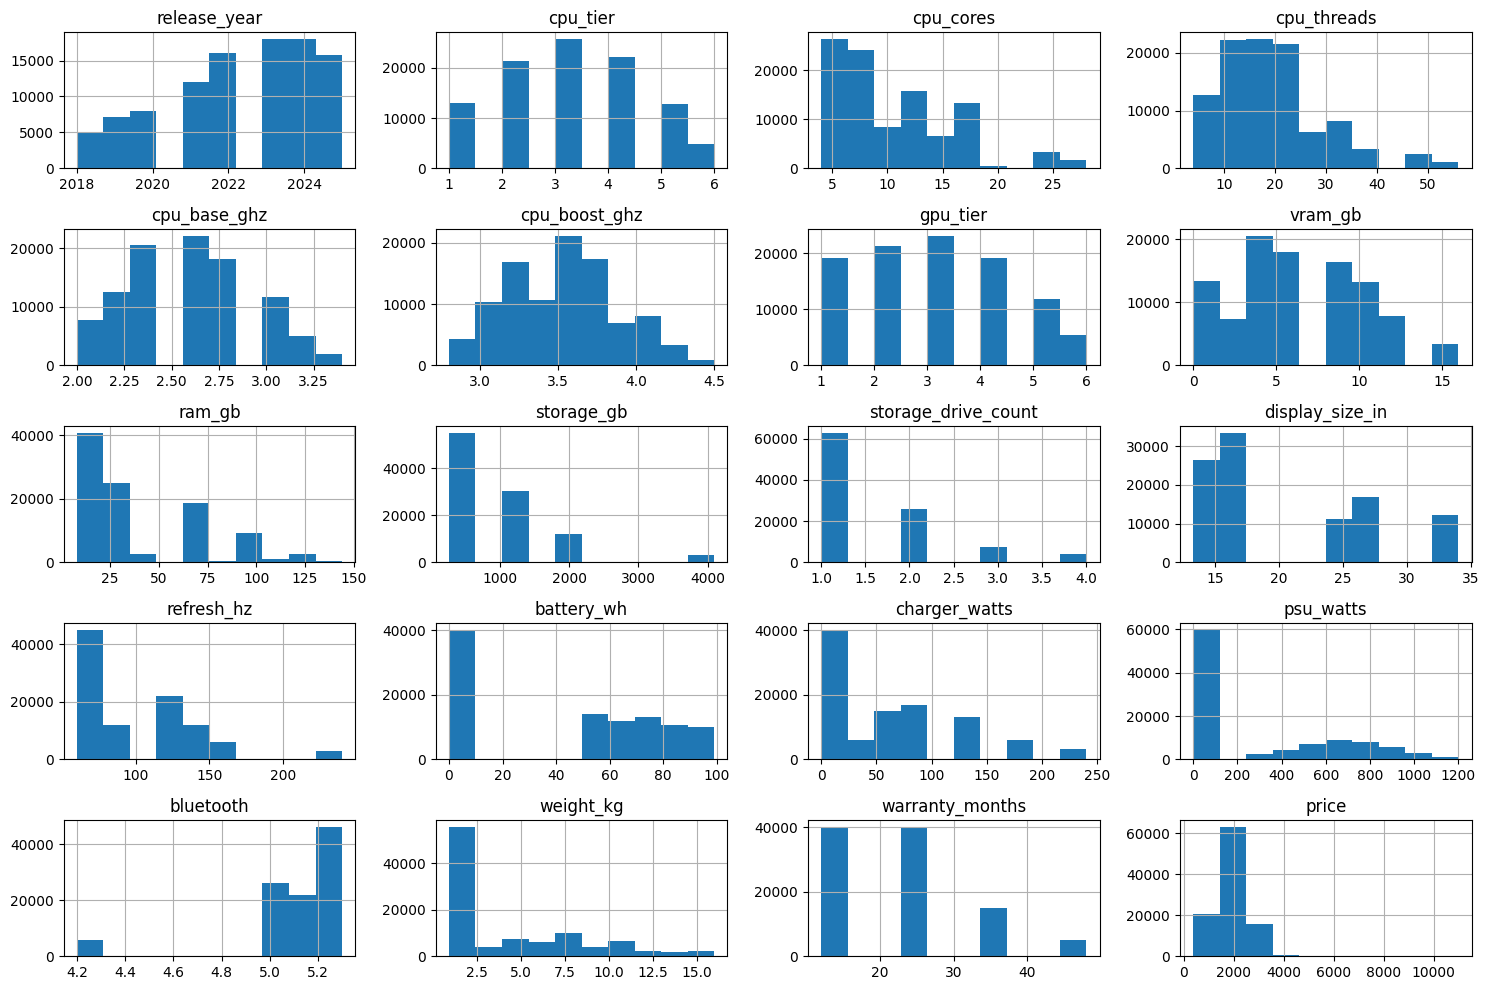

In [14]:
# Plot histograms for numerical features
df_num.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

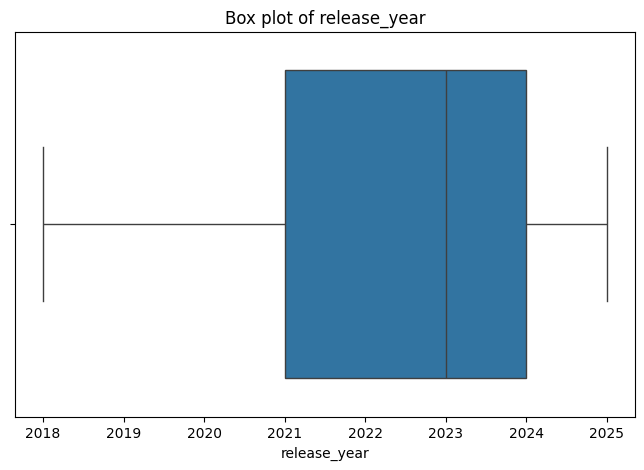

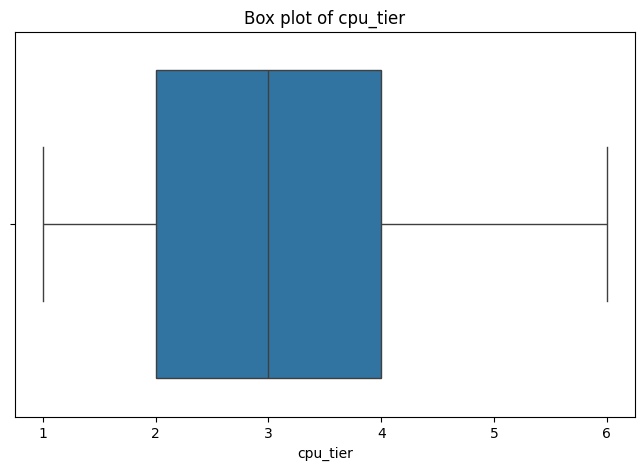

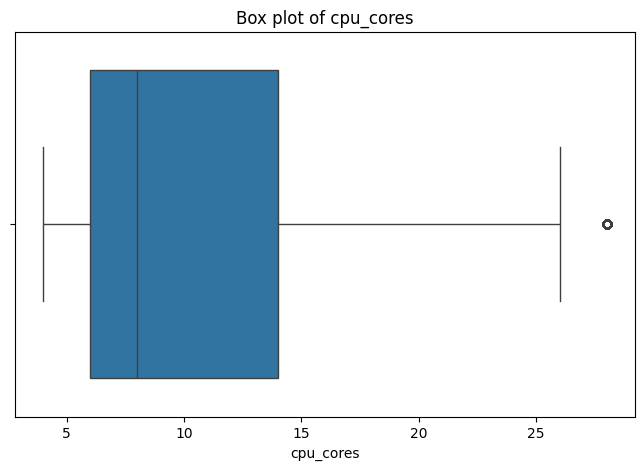

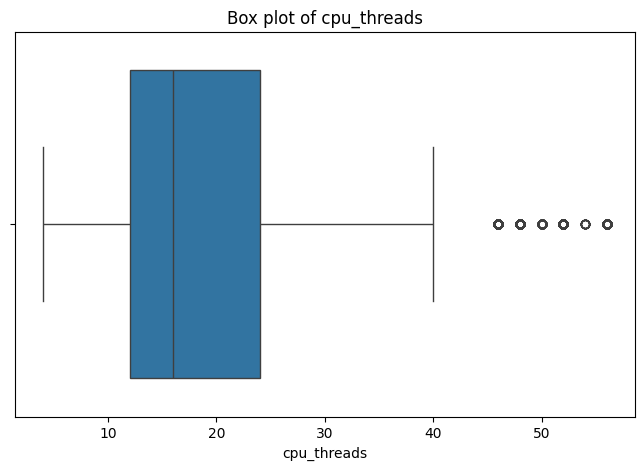

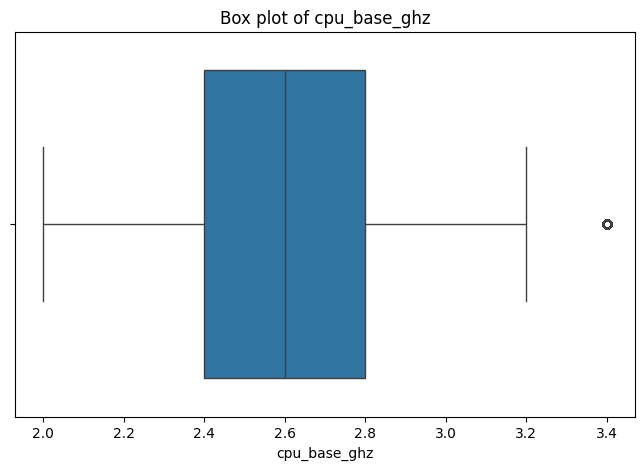

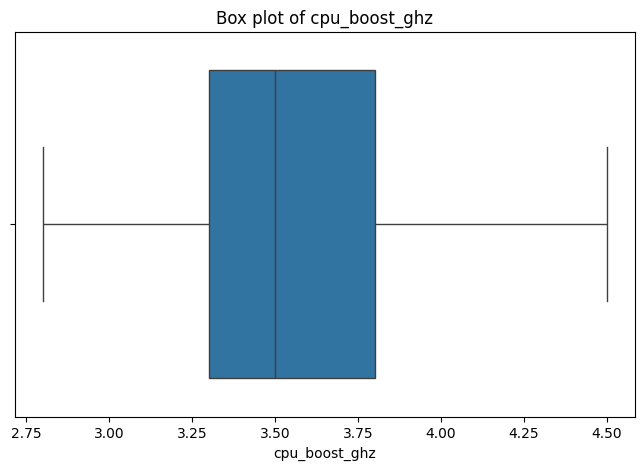

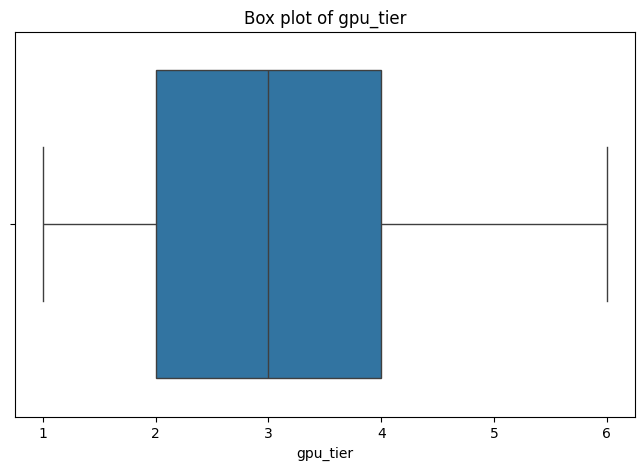

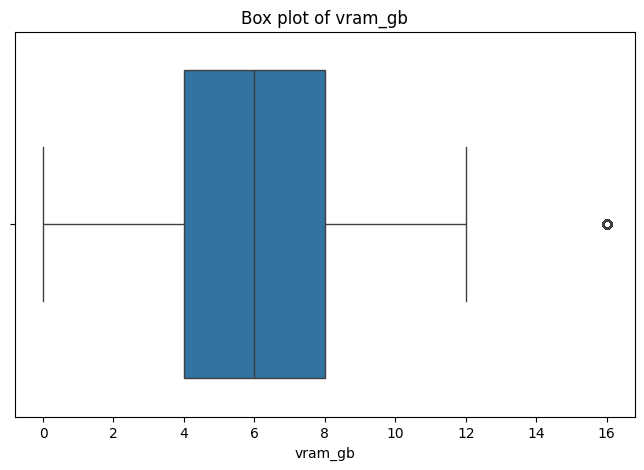

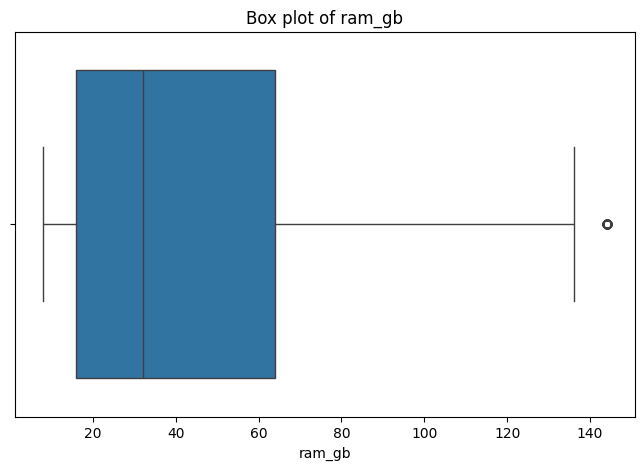

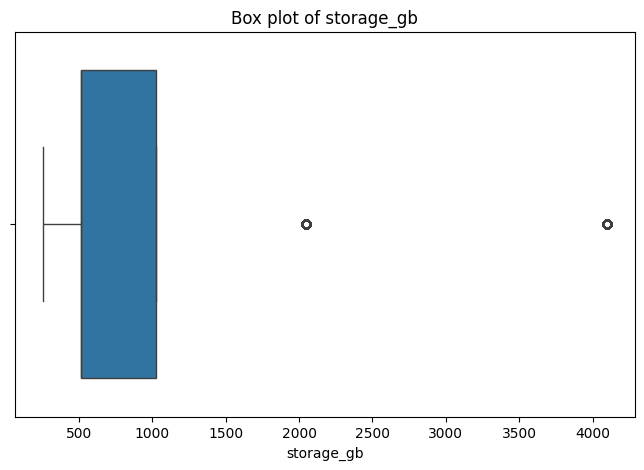

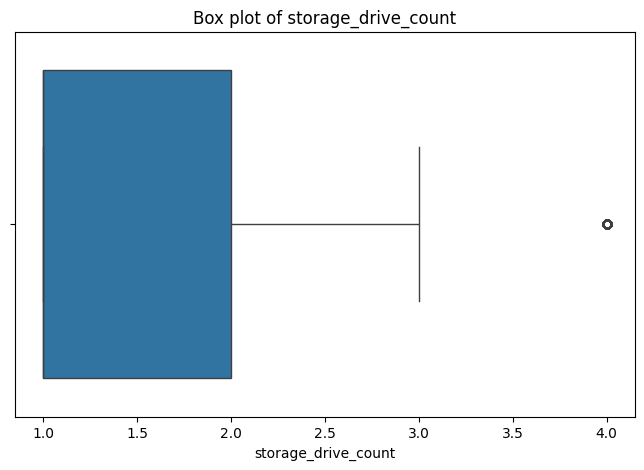

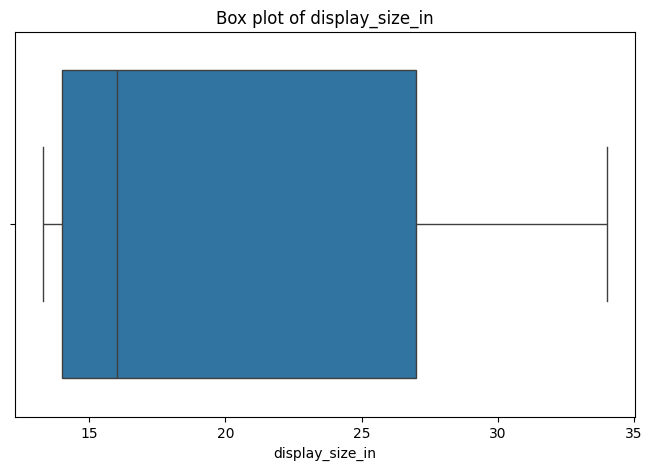

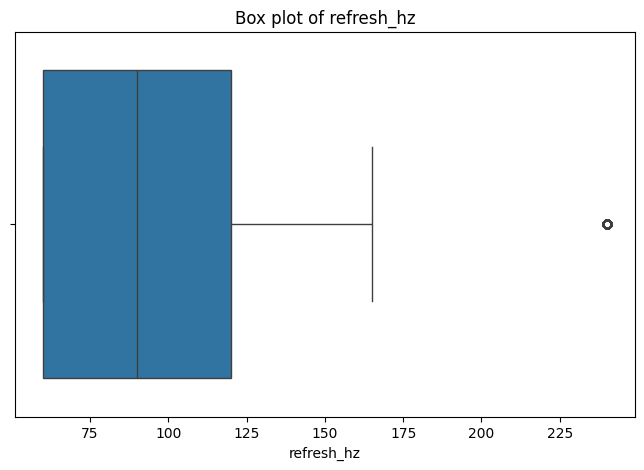

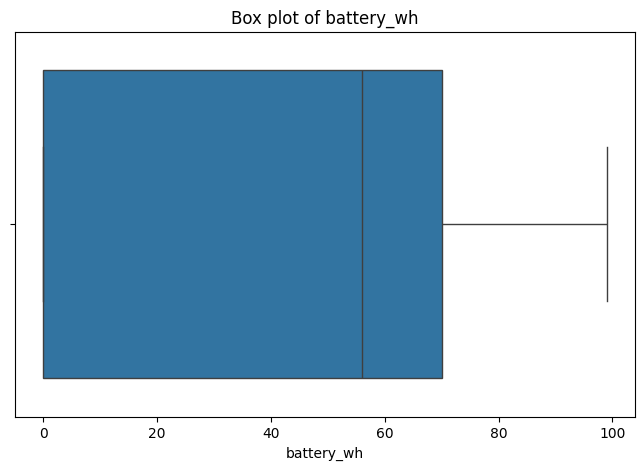

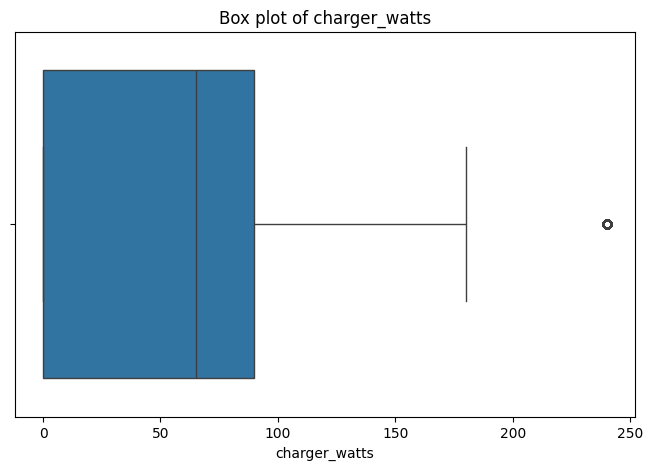

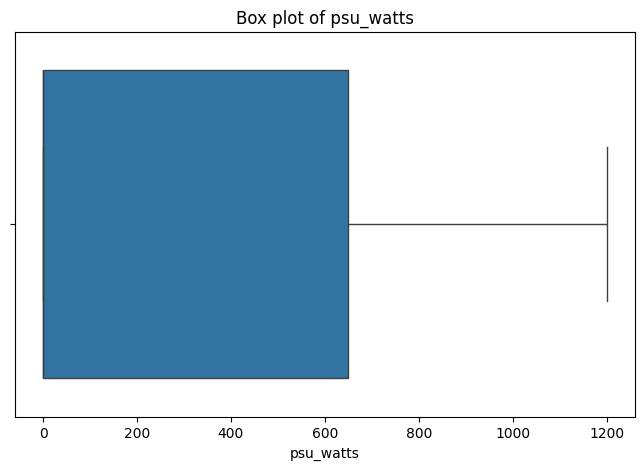

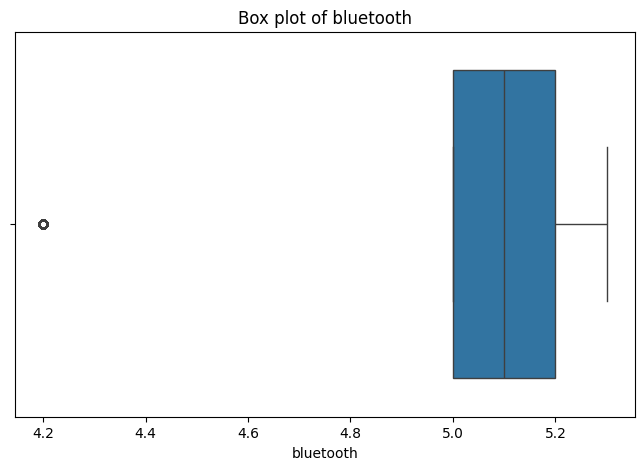

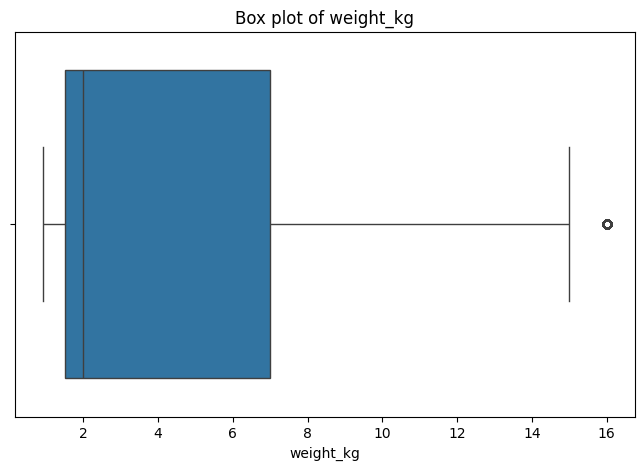

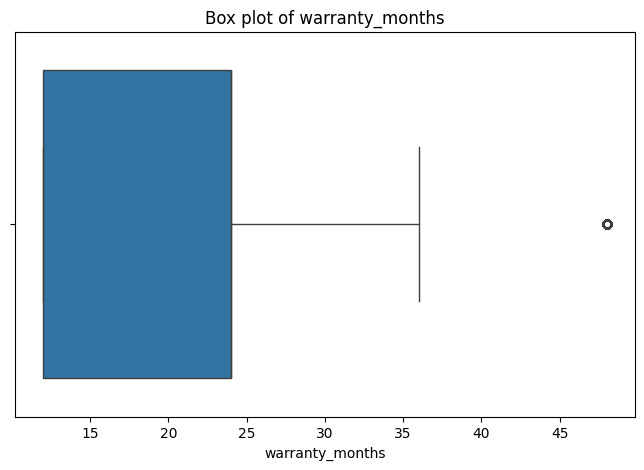

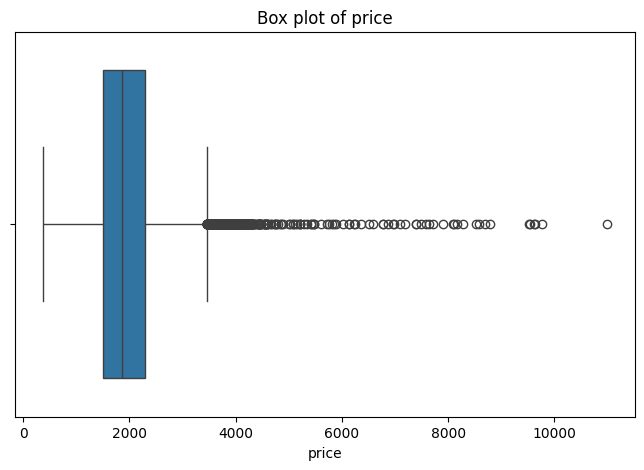

In [15]:
# Plot box plots for numerical features to visualize outliers
for column in df_num.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_num[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

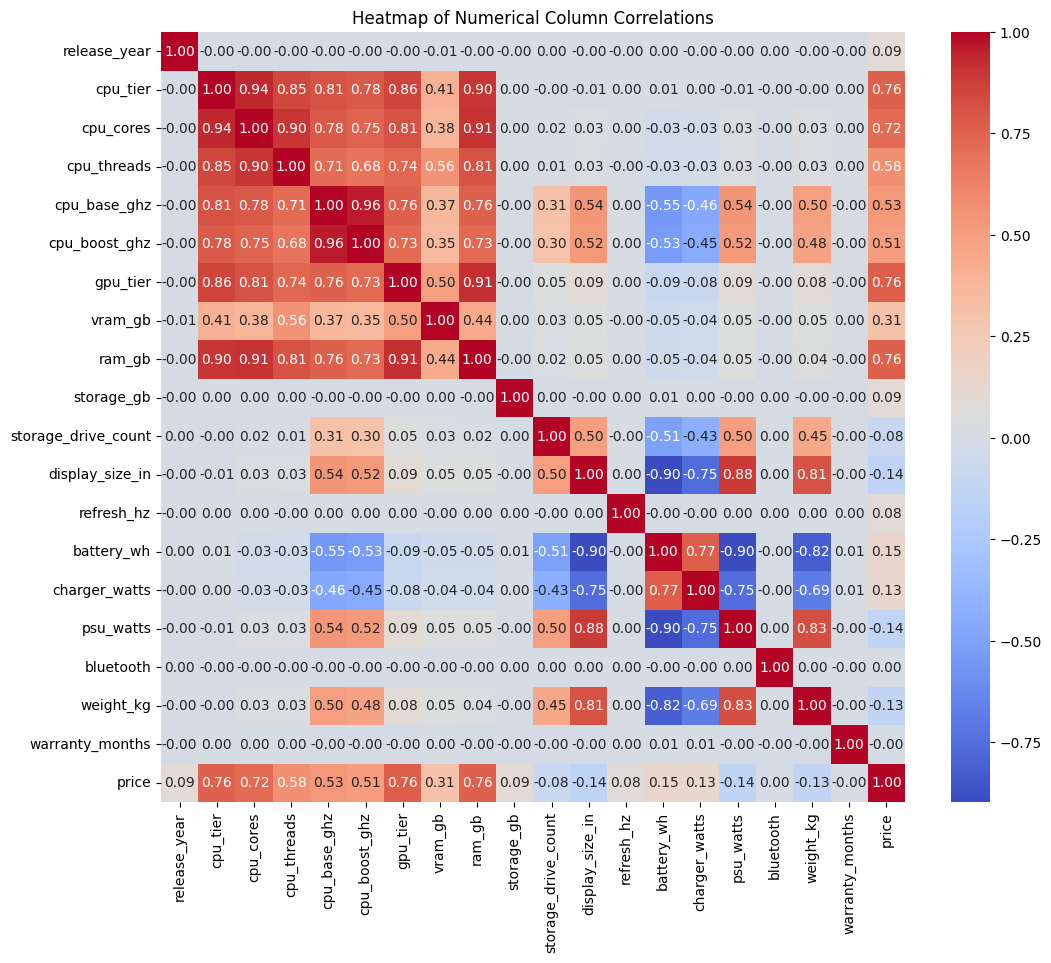

In [16]:
correlation_matrix = df_num.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Column Correlations')
plt.show()

# Drop unnecessary columns after feature selection and preprocessing
'bluetooth' & 'warranty_months' may be irrelevant,
'display_size_in' & 'charger_watts' are removed based on domain knowledge

In [17]:
df_num.drop(['bluetooth','warranty_months'],inplace=True,axis=1)
df_num.drop(['display_size_in','charger_watts'],axis=1,inplace=True)


In [18]:
df_obj.head(2)

,device_type,brand,model,os,form_factor,cpu_brand,cpu_model,gpu_brand,gpu_model,storage_type,display_type,resolution,wifi
0,Desktop,Samsung,Samsung Forge XDI,Windows,ATX,Intel,Intel i5-11129,NVIDIA,RTX 40 60,NVMe,LED,2560x1440,Wi-Fi 6
1,Laptop,Samsung,Samsung Pro KM8,Windows,Mainstream,Intel,Intel i7-11114,NVIDIA,RTX 40 80,NVMe,OLED,1920x1080,Wi-Fi 6


In [19]:
df_obj.shape

(100000, 13)

In [20]:
for col in df_obj.columns:
  print(df_obj[col].value_counts())

device_type
Laptop     59844
Desktop    40156
Name: count, dtype: int64
brand
Lenovo      15992
HP          14114
Dell        14005
Apple       11915
ASUS        10159
Acer         9925
Samsung      8066
MSI          7891
Gigabyte     4900
Razer        3033
Name: count, dtype: int64
model
Lenovo Think 0V5        3
HP Pro K9S              3
Acer Creator 3U0        3
HP Creator R41          3
ASUS Slim R6S           3
                       ..
HP Station V1X          1
HP Pro 8BH              1
Gigabyte Creator S1T    1
Apple Air DDO           1
Gigabyte Pro 5QO        1
Name: count, Length: 99036, dtype: int64
os
Windows     71817
macOS       18207
Linux        6109
ChromeOS     3867
Name: count, dtype: int64
form_factor
Mainstream     17819
Gaming         16876
ATX            15597
Ultrabook      13236
Micro-ATX       8672
Full-Tower      7110
2-in-1          7049
SFF             5585
Workstation     4864
Mini-ITX        3192
Name: count, dtype: int64
cpu_brand
Intel    52774
AMD      

#Removing model feature

In [21]:
df_obj.drop('model',axis=1,inplace=True)

#Function to classify CPU models into main groups
- Based on CPU brand (Intel, AMD, Apple)
- internal category
  (e.g., i3, i5, i7, i9 for Intel;
- Ryzen 3, 5, 7, 9 for AMD;
- M1, M2, M3 for Apple)
#Purpose: simplify data analysis and group similar CPUs for easier price prediction

In [22]:
def group_cpu(model):
    model = str(model).lower()

    # Intel CPUs
    if "intel" in model:
        if "i3" in model:
            return "Intel i3"
        elif "i5" in model:
            return "Intel i5"
        elif "i7" in model:
            return "Intel i7"
        elif "i9" in model:
            return "Intel i9"
        else:
            return "Intel Other"

    # AMD Ryzen CPUs
    elif "ryzen" in model:
        if "ryzen 3" in model:
            return "AMD Ryzen 3"
        elif "ryzen 5" in model:
            return "AMD Ryzen 5"
        elif "ryzen 7" in model:
            return "AMD Ryzen 7"
        elif "ryzen 9" in model:
            return "AMD Ryzen 9"
        else:
            return "AMD Ryzen Other"

    # Apple CPUs
    elif "apple" in model or "m1" in model or "m2" in model or "m3" in model:
        if "m1" in model:
            return "Apple M1"
        elif "m2" in model:
            return "Apple M2"
        elif "m3" in model:
            return "Apple M3"
        else:
            return "Apple Other"

    # Default
    else:
        return "Other"



df_obj['cpu_group'] = df_obj['cpu_model'].apply(group_cpu)


print(df_obj[['cpu_model', 'cpu_group']].head(50))

           cpu_model    cpu_group
0     Intel i5-11129     Intel i5
1     Intel i7-11114     Intel i7
2   AMD Ryzen 5 5168  AMD Ryzen 5
3   AMD Ryzen 5 7550  AMD Ryzen 5
4   AMD Ryzen 7 6230  AMD Ryzen 7
5     Intel i7-10369     Intel i7
6           Apple M2     Apple M2
7       Apple M2 Pro     Apple M2
8     Intel i9-14473     Intel i9
9   AMD Ryzen 3 4374  AMD Ryzen 3
10    Intel i5-13209     Intel i5
11  AMD Ryzen 5 7218  AMD Ryzen 5
12    Intel i7-12518     Intel i7
13  AMD Ryzen 7 7165  AMD Ryzen 7
14  AMD Ryzen 7 5955  AMD Ryzen 7
15  AMD Ryzen 7 5302  AMD Ryzen 7
16  AMD Ryzen 7 7128  AMD Ryzen 7
17      Apple M3 Pro     Apple M3
18    Intel i5-14935     Intel i5
19    Intel i7-11194     Intel i7
20    Intel i3-14697     Intel i3
21    Intel i7-12360     Intel i7
22      Apple M1 Pro     Apple M1
23    Intel i3-13251     Intel i3
24    Intel i5-12912     Intel i5
25    Intel i7-12494     Intel i7
26      Apple M1 Max     Apple M1
27    Intel i5-10570     Intel i5
28  AMD Ryzen 

#Based on GPU brand and series:
- Apple Integrated
- NVIDIA RTX (20, 30, 40 series)
- AMD RX (5000, 6000, 7000 series)
- Intel Arc (A and B series)
#Purpose: simplify data analysis and group similar GPUs for easier price prediction

In [23]:
def group_gpu(model):
    model = str(model).lower()

    # Apple
    if "apple" in model:
        return "Apple Integrated"

    # NVIDIA RTX
    elif "rtx 20" in model:
        return "NVIDIA RTX 20"
    elif "rtx 30" in model:
        return "NVIDIA RTX 30"
    elif "rtx 40" in model:
        return "NVIDIA RTX 40"

    # AMD RX
    elif "rx 5000" in model:
        return "AMD RX 5000"
    elif "rx 6000" in model:
        return "AMD RX 6000"
    elif "rx 7000" in model:
        return "AMD RX 7000"

    # Intel Arc
    elif "arc a" in model:
        return "Intel Arc A Series"
    elif "arc b" in model:
        return "Intel Arc B Series"

    # Default
    else:
        return "Other"



df_obj['gpu_group'] = df_obj['gpu_model'].apply(group_gpu)


print(df_obj['gpu_group'].value_counts())


gpu_group
NVIDIA RTX 40         24648
NVIDIA RTX 30         24551
Apple Integrated      18922
Intel Arc A Series     8502
AMD RX 7000            7078
AMD RX 6000            7074
NVIDIA RTX 20          5513
Intel Arc B Series     2097
AMD RX 5000            1615
Name: count, dtype: int64


# Remove original 'cpu_model' and 'gpu_model' columns after feature extraction

In [24]:
df_obj.drop(['cpu_model','gpu_model'],inplace=True,axis=1)

In [25]:
for col in df_obj.columns:
  print(df_obj[col].value_counts())

device_type
Laptop     59844
Desktop    40156
Name: count, dtype: int64
brand
Lenovo      15992
HP          14114
Dell        14005
Apple       11915
ASUS        10159
Acer         9925
Samsung      8066
MSI          7891
Gigabyte     4900
Razer        3033
Name: count, dtype: int64
os
Windows     71817
macOS       18207
Linux        6109
ChromeOS     3867
Name: count, dtype: int64
form_factor
Mainstream     17819
Gaming         16876
ATX            15597
Ultrabook      13236
Micro-ATX       8672
Full-Tower      7110
2-in-1          7049
SFF             5585
Workstation     4864
Mini-ITX        3192
Name: count, dtype: int64
cpu_brand
Intel    52774
AMD      35311
Apple    11915
Name: count, dtype: int64
gpu_brand
NVIDIA    54712
Apple     18922
AMD       15767
Intel     10599
Name: count, dtype: int64
storage_type
NVMe      45059
SSD       24937
HDD       15023
Hybrid    14981
Name: count, dtype: int64
display_type
LED         32000
OLED        21910
IPS         17742
Mini-LED    1218

In [26]:
df_final=pd.concat([df_obj,df_num],axis=1)

Removing outliers from dataset based on the IQR

In [27]:
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_finally = df_final[(df_final['price'] >= lower_bound) & (df_final['price'] <= upper_bound)]


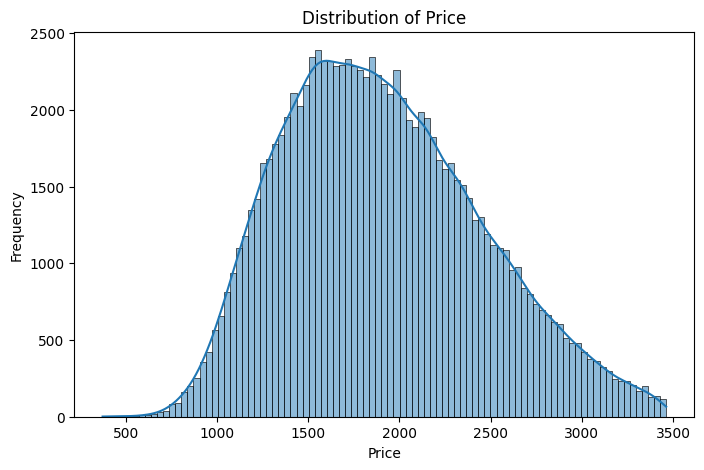

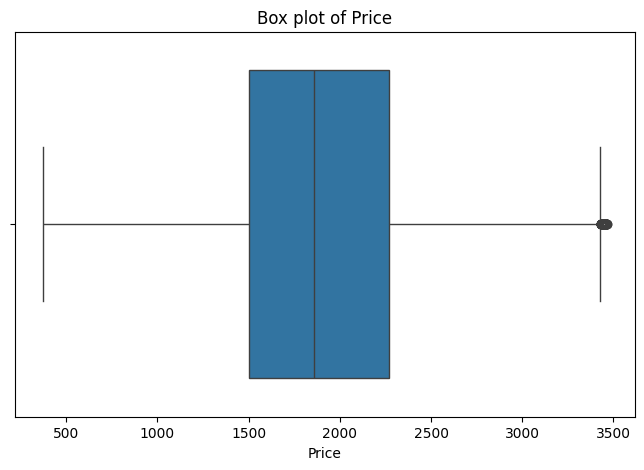

In [35]:
# Distribution plot for 'price'
plt.figure(figsize=(8, 5))
sns.histplot(data=df_finally, x='price', kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'price'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_finally['price'])
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()

In [29]:
X=df_finally.drop('price',axis=1)
y=df_finally['price']

# **Apply CatBoost regression on the dataset.**

**Reasoning: Create a list of categorical column names from the features DataFrame X**

In [30]:
categorical_features_indices = X.select_dtypes(include='object').columns.tolist()
print(categorical_features_indices)

['device_type', 'brand', 'os', 'form_factor', 'cpu_brand', 'gpu_brand', 'storage_type', 'display_type', 'resolution', 'wifi', 'cpu_group', 'gpu_group']


# **Split the data into training and testing sets.**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


# **CatBoostRegressor Model**


*   Model Training



In [33]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor( random_state=42,
    cat_features=categorical_features_indices,
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=8,
    subsample=0.8,
    early_stopping_rounds=50,
    verbose=100)
catboost_model.fit(X_train, y_train)

0:	learn: 503.4876105	total: 397ms	remaining: 6m 36s
100:	learn: 175.9789496	total: 31s	remaining: 4m 36s
200:	learn: 172.0624018	total: 52.3s	remaining: 3m 27s
300:	learn: 170.7386014	total: 1m 14s	remaining: 2m 52s
400:	learn: 169.7691981	total: 1m 35s	remaining: 2m 23s
500:	learn: 169.0817069	total: 1m 53s	remaining: 1m 53s
600:	learn: 168.3818324	total: 2m 13s	remaining: 1m 28s
700:	learn: 167.6794411	total: 2m 32s	remaining: 1m 4s
800:	learn: 167.1087913	total: 2m 58s	remaining: 44.3s
900:	learn: 166.5360810	total: 3m 16s	remaining: 21.6s
999:	learn: 165.9633892	total: 3m 35s	remaining: 0us


# **Model Evaluation**

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_test = catboost_model.predict(X_test)
y_pred_train = catboost_model.predict(X_train)

# Evaluate on test set
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("Test Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R2 Score: {r2_test:.2f}")

print("\nTrain Set Evaluation:")
# Evaluate on train set
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R2 Score: {r2_train:.2f}")

Test Set Evaluation:
Mean Absolute Error (MAE): 132.27
Root Mean Squared Error (RMSE): 173.68
R2 Score: 0.90

Train Set Evaluation:
Mean Absolute Error (MAE): 128.43
Root Mean Squared Error (RMSE): 166.82
R2 Score: 0.90
